## Calibration

The purpose of this notebook is to calibrate the camera by:
* Computing the calibration matrix and distortion coefficients from chessboard images
* Applying a distortion correction to raw images

In [1]:
import os, math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Chessboards
* Chessboard images were resized to 720x1280 outside program

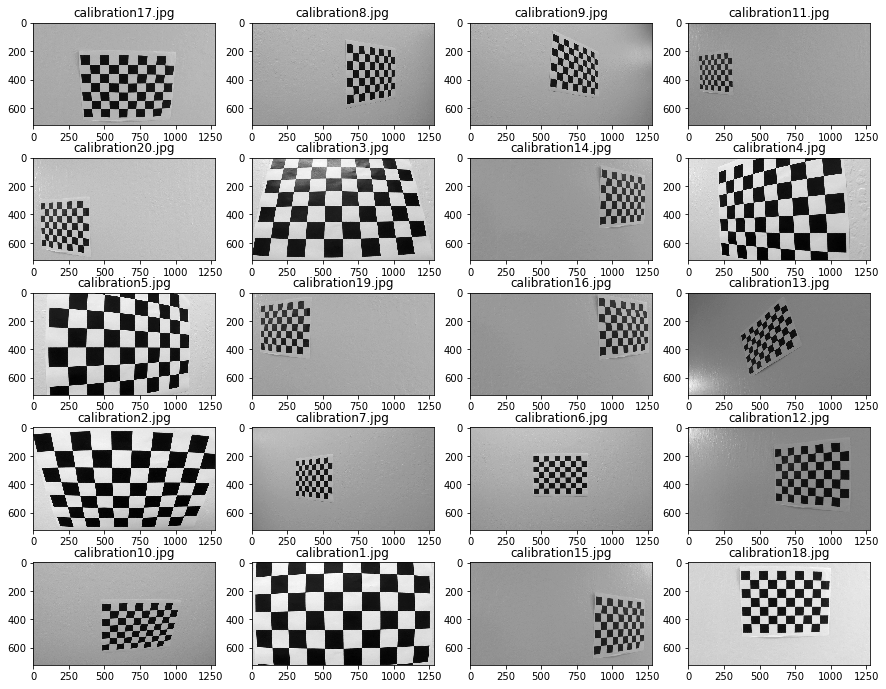

In [21]:
fig = plt.figure(figsize=(15,12))
cal_array = np.empty((20, 720, 1280))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.001)
obj_corners = np.zeros((7*7,3), np.float32)
obj_corners[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
obj_pts = []
img_pts = []
for i, cal_file in enumerate(os.listdir(os.path.join(os.getcwd(), 'camera_cal'))):
    cal_img = mpimg.imread(os.path.join(os.getcwd(), 'camera_cal', cal_file))
    cal_img = cv2.cvtColor(cal_img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(cal_img, (7, 7), None)
    ax = plt.subplot(5, 4, i+1)
    ax.set_title(cal_file)
    if ret == True:
        obj_pts.append(obj_corners)
        corners_2 = cv2.cornerSubPix(cal_img, corners,(11,11), 
                                     (-1,-1), criteria)
        img_pts.append(corners_2)
        cal_img = cv2.drawChessboardCorners(cal_img, (7,7), corners_2, ret)
#     cal_array[i,:,:] = cal_img
    plt.imshow(cal_img, cmap='gray')
plt.show()